In [1]:
import pandas as pd
import numpy as np

In [2]:
match=pd.read_csv('data/matches_updated_mens_ipl.csv')
dlv=pd.read_csv('data/deliveries_updated_mens_ipl.csv')

In [3]:
dlv['runs_per_ball']=dlv['extras']+dlv['batsman_runs']

In [4]:
dlv['runs_scored_so_far'] = dlv.groupby(['matchId', 'inning'])['runs_per_ball'].cumsum()


In [5]:
dlv['overs_bowled']=dlv['over']+dlv['ball']/6

In [6]:
dlv['crr']=dlv['runs_scored_so_far']/dlv['overs_bowled']

In [7]:
dlv['fow'] = dlv['dismissal_kind'].apply(lambda x: 0 if pd.isna(x) else 1)


In [8]:
dlv['wickets'] = dlv.groupby(['matchId', 'inning'])['fow'].cumsum()

In [9]:
dlv['rem_wickets']=10-dlv['wickets']
#completed with dlv

In [10]:
total_score_df = dlv.groupby(['matchId','inning']).sum(numeric_only=True)['runs_per_ball'].reset_index()

In [11]:
total_score_df1=total_score_df[total_score_df['inning']==1]
total_score_df2=total_score_df[total_score_df['inning']==2]

In [12]:
total_score_df1['rr']=total_score_df1['runs_per_ball']/20

/tmp/ipykernel_5870/3238814262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_score_df1['rr']=total_score_df1['runs_per_ball']/20


In [13]:
match_df=match.merge(total_score_df1[['matchId','runs_per_ball','rr']],on='matchId')

In [14]:
match_df['team1']=match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team1']=match_df['team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['team2']=match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Gujarat Lions','Gujarat Titans')

In [15]:
match_df=match_df[match_df['team1']!='Kochi Tuskers Kerala']
match_df=match_df[match_df['team1']!='Rising Pune Supergiant']
match_df=match_df[match_df['team1']!='Rising Pune Supergiants']
match_df=match_df[match_df['team1']!='Pune Warriors']
match_df=match_df[match_df['team2']!='Kochi Tuskers Kerala']
match_df=match_df[match_df['team2']!='Rising Pune Supergiant']
match_df=match_df[match_df['team2']!='Rising Pune Supergiants']
match_df=match_df[match_df['team2']!='Pune Warriors']


In [16]:
match_df=match_df[match_df['method']!='D/L']

In [17]:
match_df=match_df.drop('method', axis=1)

In [18]:
venue_mapping = {
    'Sharjah Cricket Stadium': 'Sharjah',
    'Dubai International Cricket Stadium': 'Dubai'
}

In [19]:
match_df['city'] = match_df['city'].fillna(match_df['venue'].map(venue_mapping))


In [20]:
#match_df1=match_df[match_df['matchId','winner','runs_per_ball','city']]
match_df1=match_df[['matchId','city','runs_per_ball','winner']]

In [21]:
dlvn_df=match_df1.merge(dlv,on='matchId')

In [22]:
dlvn_df=dlvn_df[dlvn_df['inning']==2]

In [23]:
dlvn_df['rrr']=(dlvn_df['runs_per_ball_x']+1-dlvn_df['runs_scored_so_far'])/(20-dlvn_df['overs_bowled'])


In [24]:
dlvn_df

,matchId,city,runs_per_ball_x,winner,inning,over_ball,over,ball,batting_team,bowling_team,...,player_dismissed,date,runs_per_ball_y,runs_scored_so_far,overs_bowled,crr,fow,wickets,rem_wickets,rrr
124,335982,Bangalore,222,Kolkata Knight Riders,2,0.1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,2008-04-18,1,1,0.166667,6.000000,0,0,10,11.193277
125,335982,Bangalore,222,Kolkata Knight Riders,2,0.2,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,2008-04-18,1,2,0.333333,6.000000,0,0,10,11.237288
126,335982,Bangalore,222,Kolkata Knight Riders,2,0.3,0,3,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,2008-04-18,0,2,0.500000,4.000000,0,0,10,11.333333
127,335982,Bangalore,222,Kolkata Knight Riders,2,0.4,0,4,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,2008-04-18,1,3,0.666667,4.500000,0,0,10,11.379310
128,335982,Bangalore,222,Kolkata Knight Riders,2,0.5,0,5,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,2008-04-18,1,4,0.833333,4.800000,0,0,10,11.426087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220973,1370353,Ahmedabad,214,Chennai Super Kings,2,14.2,14,2,Chennai Super Kings,Gujarat Titans,...,NaN,2023-05-29,1,159,14.333333,11.093023,0,5,5,9.882353
220974,1370353,Ahmedabad,214,Chennai Super Kings,2,14.3,14,3,Chennai Super Kings,Gujarat Titans,...,NaN,2023-05-29,1,160,14.500000,11.034483,0,5,5,10.000000
220975,1370353,Ahmedabad,214,Chennai Super Kings,2,14.4,14,4,Chennai Super Kings,Gujarat Titans,...,NaN,2023-05-29,1,161,14.666667,10.977273,0,5,5,10.125000
220976,1370353,Ahmedabad,214,Chennai Super Kings,2,14.5,14,5,Chennai Super Kings,Gujarat Titans,...,NaN,2023-05-29,6,167,14.833333,11.258427,0,5,5,9.290323


In [25]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [26]:
dlvn_df['result']=dlvn_df.apply(result,axis=1)

In [27]:
dlvn_df['runs_left']=dlvn_df['runs_per_ball_x']-dlvn_df['runs_scored_so_far']+1
dlvn_df['balls_left']=(19-dlvn_df['over'])*6+(6-dlvn_df['ball']) 

In [28]:
#
dlvn_df['balls_left']=dlvn_df['balls_left'].apply(lambda x: 0 if x<0 else x)

In [29]:
dlvn_df.columns

Index(['matchId', 'city', 'runs_per_ball_x', 'winner', 'inning', 'over_ball',
       'over', 'ball', 'batting_team', 'bowling_team', 'batsman',
       'non_striker', 'bowler', 'batsman_runs', 'extras', 'isWide', 'isNoBall',
       'Byes', 'LegByes', 'Penalty', 'dismissal_kind', 'player_dismissed',
       'date', 'runs_per_ball_y', 'runs_scored_so_far', 'overs_bowled', 'crr',
       'fow', 'wickets', 'rem_wickets', 'rrr', 'result', 'runs_left',
       'balls_left'],
      dtype='object')

In [30]:
final_df=dlvn_df[['batting_team','bowling_team','city','runs_left','balls_left','rem_wickets','runs_per_ball_x','crr','rrr','result']]

In [31]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,rem_wickets,runs_per_ball_x,crr,rrr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,119,10,222,6.000000,11.193277,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,118,10,222,6.000000,11.237288,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,117,10,222,4.000000,11.333333,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,116,10,222,4.500000,11.379310,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,115,10,222,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...
220973,Chennai Super Kings,Gujarat Titans,Ahmedabad,56,34,5,214,11.093023,9.882353,1
220974,Chennai Super Kings,Gujarat Titans,Ahmedabad,55,33,5,214,11.034483,10.000000,1
220975,Chennai Super Kings,Gujarat Titans,Ahmedabad,54,32,5,214,10.977273,10.125000,1
220976,Chennai Super Kings,Gujarat Titans,Ahmedabad,48,31,5,214,11.258427,9.290323,1


In [32]:
#final_df.sample.shape

In [33]:
final_df['rrr'].max()

inf

In [34]:
final_df = final_df[np.isfinite(final_df['rrr'])]


In [35]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,rem_wickets,runs_per_ball_x,crr,rrr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,119,10,222,6.000000,11.193277,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,118,10,222,6.000000,11.237288,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,117,10,222,4.000000,11.333333,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,116,10,222,4.500000,11.379310,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,115,10,222,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...
220973,Chennai Super Kings,Gujarat Titans,Ahmedabad,56,34,5,214,11.093023,9.882353,1
220974,Chennai Super Kings,Gujarat Titans,Ahmedabad,55,33,5,214,11.034483,10.000000,1
220975,Chennai Super Kings,Gujarat Titans,Ahmedabad,54,32,5,214,10.977273,10.125000,1
220976,Chennai Super Kings,Gujarat Titans,Ahmedabad,48,31,5,214,11.258427,9.290323,1


In [36]:
final_df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Delhi Capitals',
       'Punjab Kings', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [37]:
final_df['batting_team']=final_df['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['batting_team']=final_df['batting_team'].str.replace('Gujarat Lions','Gujarat Titans')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Gujarat Lions','Gujarat Titans')

/tmp/ipykernel_5870/1755428906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['batting_team']=final_df['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
/tmp/ipykernel_5870/1755428906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
/tmp/ipykernel_5870/1755428906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [38]:
final_df['rrr']=final_df['rrr'].apply(lambda x: 0 if x<0 else x)

/tmp/ipykernel_5870/4128494340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['rrr']=final_df['rrr'].apply(lambda x: 0 if x<0 else x)


In [39]:
final_df['rrr'].min()

0.0

In [40]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [43]:
x_train

,batting_team,bowling_team,city,runs_left,balls_left,rem_wickets,runs_per_ball_x,crr,rrr
129473,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,142,117,10,147,12.000000,7.282051
175367,Sunrisers Hyderabad,Delhi Capitals,Chennai,55,33,6,159,7.241379,10.000000
196571,Kolkata Knight Riders,Rajasthan Royals,Mumbai,80,57,8,152,6.952381,8.421053
160320,Sunrisers Hyderabad,Mumbai Indians,Sharjah,185,103,10,208,8.470588,10.776699
11271,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,43,24,6,165,7.687500,10.750000
...,...,...,...,...,...,...,...,...,...
103851,Mumbai Indians,Chennai Super Kings,Chennai,75,60,10,158,8.400000,7.500000
203523,Kolkata Knight Riders,Punjab Kings,Chandigarh,142,78,7,191,7.142857,10.923077
10961,Chennai Super Kings,Rajasthan Royals,Chennai,146,83,9,211,10.702703,10.554217
161299,Chennai Super Kings,Kolkata Knight Riders,Abu Dhabi,147,104,10,167,7.875000,8.480769


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [45]:
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False, drop='first'), ['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.pipeline import Pipeline

In [48]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [49]:
pipe.fit(x_train,y_train)

/usr/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [50]:
y_pred=pipe.predict(x_test) 

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8061895369587677

In [52]:
pipe.predict_proba(x_test)[3]

array([0.84982351, 0.15017649])

In [53]:
x_test

,batting_team,bowling_team,city,runs_left,balls_left,rem_wickets,runs_per_ball_x,crr,rrr
26493,Royal Challengers Bangalore,Chennai Super Kings,Johannesburg,66,62,8,146,8.379310,6.387097
82125,Sunrisers Hyderabad,Punjab Kings,Sharjah,147,81,7,193,7.230769,10.888889
75004,Punjab Kings,Royal Challengers Bangalore,Chandigarh,178,106,10,190,5.571429,10.075472
203505,Kolkata Knight Riders,Punjab Kings,Chandigarh,163,95,8,191,6.960000,10.294737
37694,Rajasthan Royals,Mumbai Indians,Jaipur,104,46,5,174,5.756757,13.565217
...,...,...,...,...,...,...,...,...,...
191450,Mumbai Indians,Lucknow Super Giants,Mumbai,141,80,7,199,8.850000,10.575000
195853,Mumbai Indians,Rajasthan Royals,Navi Mumbai,35,24,6,158,7.750000,8.750000
25290,Kolkata Knight Riders,Rajasthan Royals,Durban,58,53,5,101,3.940299,6.566038
219176,Delhi Capitals,Chennai Super Kings,Delhi,219,115,10,223,6.000000,11.426087


In [54]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [55]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['matchId'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','rem_wickets','runs_per_ball_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['runs_per_ball_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['rem_wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [56]:
temp_df,target = match_progression(dlvn_df,1370353,pipe)
temp_df

Target- 214


,end_of_over,runs_after_over,wickets_in_over,lose,win
220889,1,9,0,66.3,33.7
220895,2,13,0,55.8,44.2
220902,3,12,0,46.4,53.6
220908,4,17,0,30.4,69.6
220914,5,5,0,31.5,68.5
220921,6,15,0,20.6,79.4
220927,7,6,1,30.4,69.6
220934,8,16,1,27.9,72.1
220940,9,5,0,29.3,70.7
220947,10,13,0,20.7,79.3


In [57]:
dlvn_df[dlvn_df['matchId']==1370353]

,matchId,city,runs_per_ball_x,winner,inning,over_ball,over,ball,batting_team,bowling_team,...,runs_scored_so_far,overs_bowled,crr,fow,wickets,rem_wickets,rrr,result,runs_left,balls_left
220884,1370353,Ahmedabad,214,Chennai Super Kings,2,0.1,0,1,Chennai Super Kings,Gujarat Titans,...,0,0.166667,0.000000,0,0,10,10.840336,1,215,119
220885,1370353,Ahmedabad,214,Chennai Super Kings,2,0.2,0,2,Chennai Super Kings,Gujarat Titans,...,0,0.333333,0.000000,0,0,10,10.932203,1,215,118
220886,1370353,Ahmedabad,214,Chennai Super Kings,2,0.3,0,3,Chennai Super Kings,Gujarat Titans,...,4,0.500000,8.000000,0,0,10,10.820513,1,211,117
220887,1370353,Ahmedabad,214,Chennai Super Kings,2,0.4,0,4,Chennai Super Kings,Gujarat Titans,...,6,0.666667,9.000000,0,0,10,10.810345,1,209,116
220888,1370353,Ahmedabad,214,Chennai Super Kings,2,0.5,0,5,Chennai Super Kings,Gujarat Titans,...,6,0.833333,7.200000,0,0,10,10.904348,1,209,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220973,1370353,Ahmedabad,214,Chennai Super Kings,2,14.2,14,2,Chennai Super Kings,Gujarat Titans,...,159,14.333333,11.093023,0,5,5,9.882353,1,56,34
220974,1370353,Ahmedabad,214,Chennai Super Kings,2,14.3,14,3,Chennai Super Kings,Gujarat Titans,...,160,14.500000,11.034483,0,5,5,10.000000,1,55,33
220975,1370353,Ahmedabad,214,Chennai Super Kings,2,14.4,14,4,Chennai Super Kings,Gujarat Titans,...,161,14.666667,10.977273,0,5,5,10.125000,1,54,32
220976,1370353,Ahmedabad,214,Chennai Super Kings,2,14.5,14,5,Chennai Super Kings,Gujarat Titans,...,167,14.833333,11.258427,0,5,5,9.290323,1,48,31


Text(0.5, 1.0, 'Target-214')

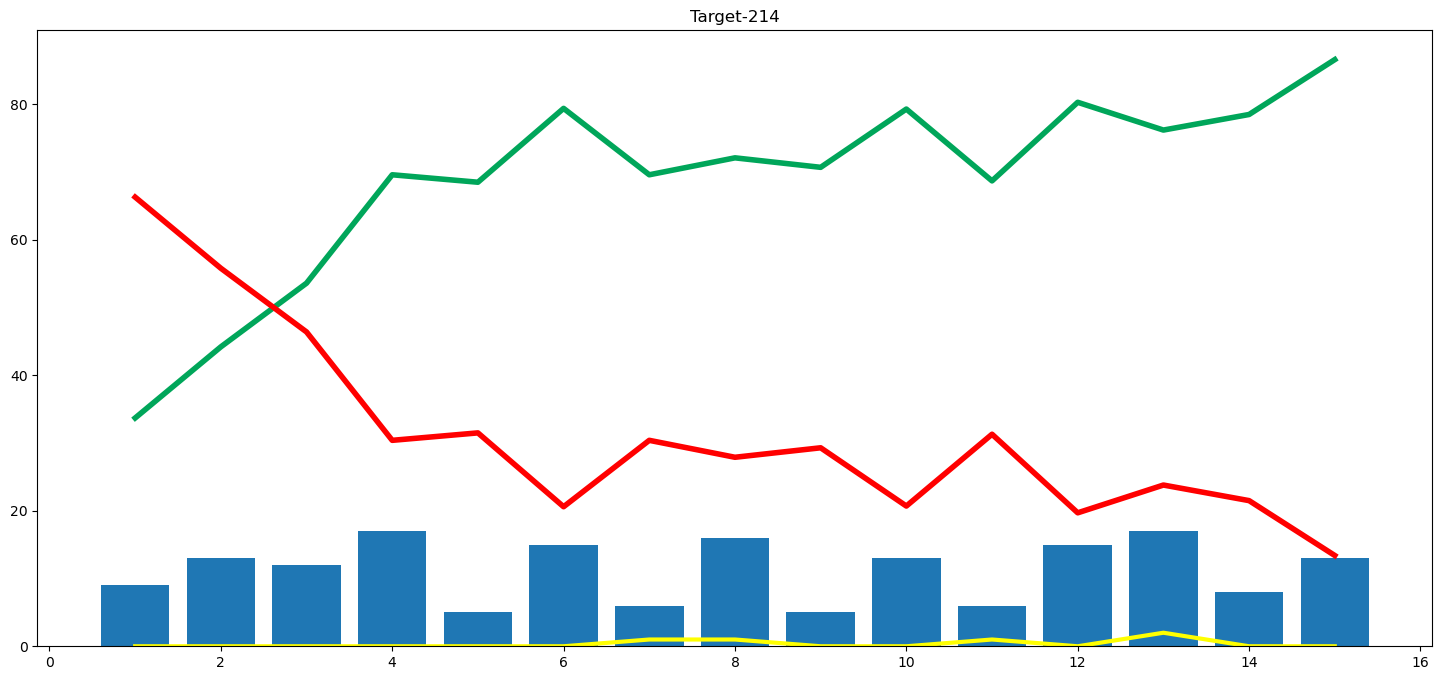

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [59]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [60]:
dlvn_df['batting_team'].unique()


array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Delhi Capitals',
       'Punjab Kings', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [61]:
dlvn_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru', 'Indore',
       'Navi Mumbai', 'Lucknow', 'Guwahati'], dtype=object)